## Microsoft Stock Time Series Dataset

Name: Ram Srikar Putcha

Link:https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

# Prediction Target:

Our analysis focuses on forecasting future stock price movements using a multi-variable time series dataset. The key target variable is close_diff, which measures the day-to-day changes in the stock's closing price. By predicting these price differentials, we can anticipate future stock price movements and their magnitude.

This approach has several advantages:

Captures price momentum and trends

Helps identify potential market shifts

Provides insights into price volatility

More statistically stable than predicting absolute prices

The model will utilize various input features from the dataset to predict these closing price changes, making it a comprehensive price movement forecasting system.


I have also added a Model Evaluation Analysis at the end for better context.


Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

c:\Users\Welcome\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Reading the dataset

In [2]:
df = pd.read_csv("D:\RSP\Adv Data Sci proj\data2\Microsoft_Stock.csv")
df.head(11)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [3]:
df.tail(11)

,Date,Open,High,Low,Close,Volume
1500,3/17/2021 16:00:00,236.15,238.55,233.23,237.04,29562100
1501,3/18/2021 16:00:00,232.56,234.19,230.33,230.72,34852251
1502,3/19/2021 16:00:00,231.02,232.47,229.35,230.35,46430730
1503,3/22/2021 16:00:00,230.27,236.90,230.14,235.99,30127005
1504,3/23/2021 16:00:00,237.49,241.05,237.07,237.58,31638376
1505,3/24/2021 16:00:00,237.85,238.00,235.32,235.46,25620127
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


# Information about the data¶

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [6]:
df.max()

Date      9/9/2020 16:00:00
Open                 245.03
High                 246.13
Low                  242.92
Close                244.99
Volume            135227059
dtype: object

In [7]:
df.min()

Date      1/10/2017 16:00:00
Open                   40.34
High                   40.74
Low                    39.72
Close                  40.29
Volume                101612
dtype: object

In [8]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(1511, 6)

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#  Microsoft's stock price trend from 2015 to 2021?

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

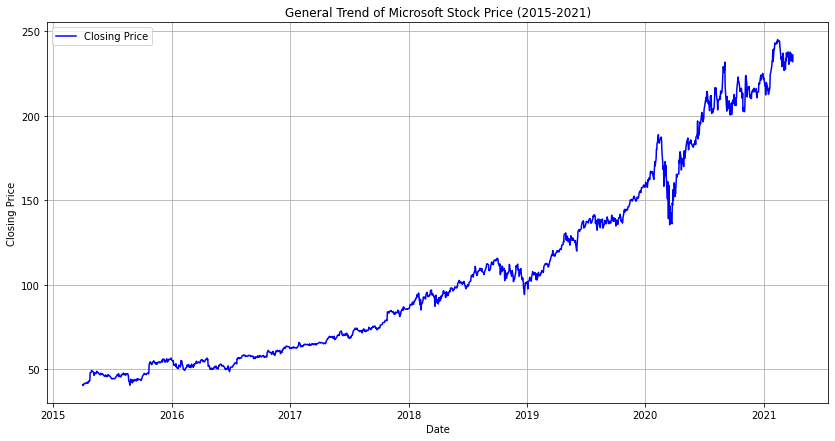

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('General Trend of Microsoft Stock Price (2015-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
df['Volatility'] = df['High'] - df['Low']
top_volatility_periods = df.sort_values(by='Volatility', ascending=False).head(10)
print("Top periods with highest volatility:")
print(top_volatility_periods[['Date', 'Volatility']])

Top periods with highest volatility:
                    Date  Volatility
1246 2020-03-13 16:00:00       21.18
1245 2020-03-12 16:00:00       14.89
1367 2020-09-03 16:00:00       14.35
1247 2020-03-16 16:00:00       14.35
1368 2020-09-04 16:00:00       13.17
1238 2020-03-03 16:00:00       12.74
1248 2020-03-17 16:00:00       12.50
1362 2020-08-27 16:00:00       11.75
1236 2020-02-28 16:00:00       11.71
1232 2020-02-24 16:00:00       11.32


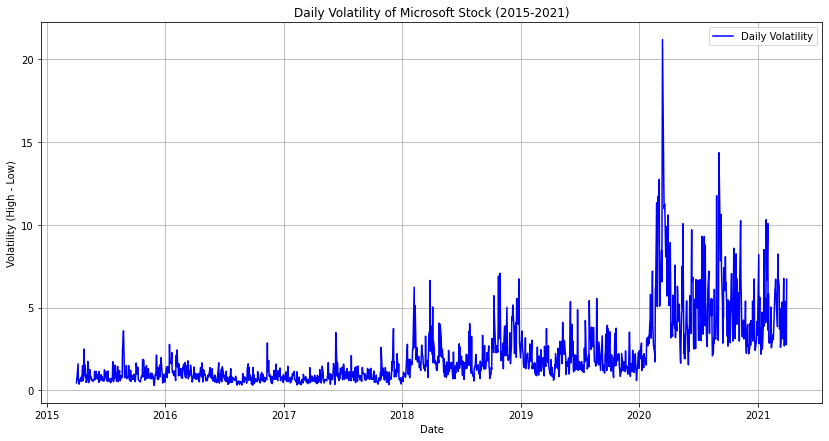

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'], label='Daily Volatility', color='blue')
plt.title('Daily Volatility of Microsoft Stock (2015-2021)')
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
df['Volatility'] = df['High'] - df['Low']

In [17]:
top_volatility_periods = df.sort_values(by='Volatility', ascending=False).head(10)
print("Top periods with highest volatility:")
print(top_volatility_periods[['Date', 'High', 'Low', 'Volatility']])

Top periods with highest volatility:
                    Date    High     Low  Volatility
1246 2020-03-13 16:00:00  161.91  140.73       21.18
1245 2020-03-12 16:00:00  153.47  138.58       14.89
1367 2020-09-03 16:00:00  229.31  214.96       14.35
1247 2020-03-16 16:00:00  149.35  135.00       14.35
1368 2020-09-04 16:00:00  218.36  205.19       13.17
1238 2020-03-03 16:00:00  175.00  162.26       12.74
1248 2020-03-17 16:00:00  147.50  135.00       12.50
1362 2020-08-27 16:00:00  231.15  219.40       11.75
1236 2020-02-28 16:00:00  163.71  152.00       11.71
1232 2020-02-24 16:00:00  174.55  163.23       11.32


#  Stock performance in certain months of the year. There are certain months when the price rises significantly

In [18]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_performance = df.groupby('Month')['Close'].mean().reset_index()
print("Average Monthly Performance:")
print(monthly_performance)

Average Monthly Performance:
    Month       Close
0       1  115.697851
1       2  121.646348
2       3  119.433258
3       4   91.864758
4       5   95.253543
5       6   98.247442
6       7  104.859449
7       8  104.957669
8       9  105.610984
9      10  108.346391
10     11  110.505285
11     12  113.881520


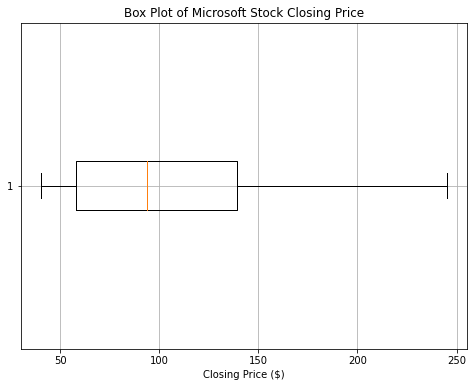

In [52]:
# Boxplot to check for outliers in the Closing Price
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'], vert=False)
plt.title('Box Plot of Microsoft Stock Closing Price')
plt.xlabel('Closing Price ($)')
plt.grid(True)
plt.show()

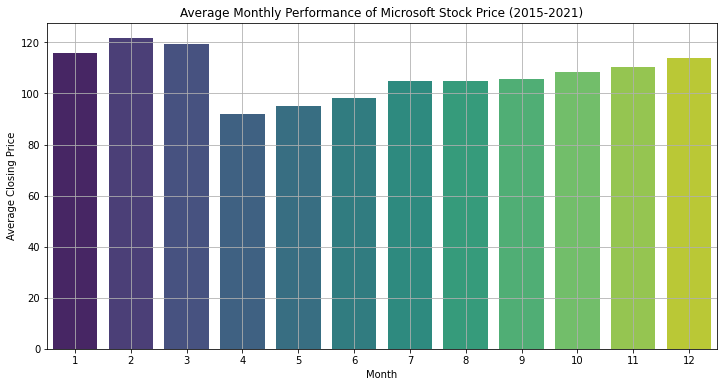

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_performance, x='Month', y='Close', palette='viridis')
plt.title('Average Monthly Performance of Microsoft Stock Price (2015-2021)')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

In [20]:
highest_month = monthly_performance.loc[monthly_performance['Close'].idxmax()]
lowest_month = monthly_performance.loc[monthly_performance['Close'].idxmin()]

print(f"\nMonth with Highest Average Closing Price: {highest_month['Month']} with Price {highest_month['Close']:.2f}")
print(f"Month with Lowest Average Closing Price: {lowest_month['Month']} with Price {lowest_month['Close']:.2f}")


Month with Highest Average Closing Price: 2.0 with Price 121.65
Month with Lowest Average Closing Price: 4.0 with Price 91.86


# Stock performance on different days of the week. There are certain days when the stock is strongest

In [22]:
df['DayOfWeek'] = df['Date'].dt.dayofweek
weekly_performance = df.groupby('DayOfWeek')['Close'].mean().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_performance['DayOfWeek'] = weekly_performance['DayOfWeek'].apply(lambda x: days[x])
print("Average Performance by Day of the Week:")
print(weekly_performance)

Average Performance by Day of the Week:
   DayOfWeek       Close
0     Monday  107.886056
1    Tuesday  107.772290
2  Wednesday  107.275581
3   Thursday  107.054020
4     Friday  107.148738


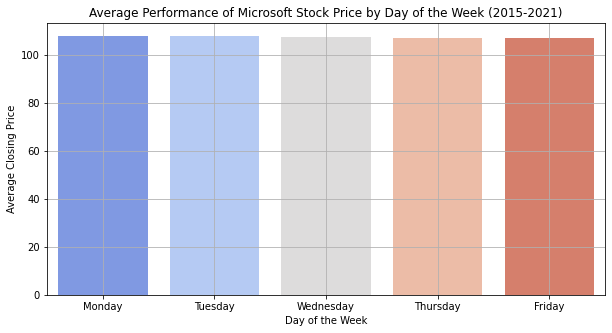

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_performance, x='DayOfWeek', y='Close', palette='coolwarm')
plt.title('Average Performance of Microsoft Stock Price by Day of the Week (2015-2021)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

In [24]:
highest_day = weekly_performance.loc[weekly_performance['Close'].idxmax()]
lowest_day = weekly_performance.loc[weekly_performance['Close'].idxmin()]

print(f"\nDay with Highest Average Closing Price: {highest_day['DayOfWeek']} with Price {highest_day['Close']:.2f}")
print(f"Day with Lowest Average Closing Price: {lowest_day['DayOfWeek']} with Price {lowest_day['Close']:.2f}")


Day with Highest Average Closing Price: Monday with Price 107.89
Day with Lowest Average Closing Price: Thursday with Price 107.05


#  There is a correlation between trading volume and stock price change

In [25]:
df['Price Change'] = df['Close'].diff()
df = df.dropna()

In [26]:
correlation = df['Price Change'].corr(df['Volume'])

# Display the correlation coefficient
print(f'Correlation between stock price change and trading volume: {correlation}')

Correlation between stock price change and trading volume: -0.0577046424782532


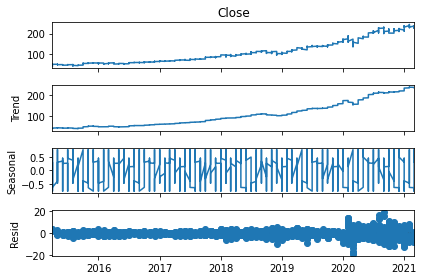

In [53]:
# Decompose the time series (using the 'Close' column to analyze trends, seasonality, and noise)
result = seasonal_decompose(df['Close'], model='additive', period=30)  # Adjust period based on data frequency (e.g., daily data has 30-day seasonality)
result.plot()
plt.show()


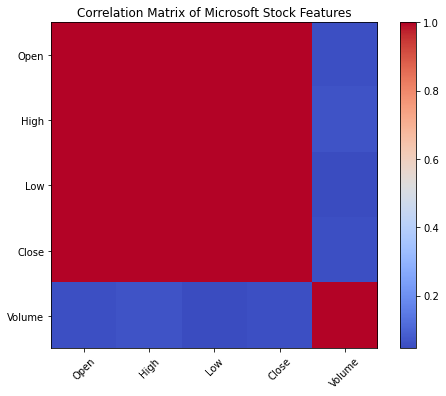

In [54]:
# Visualizing the correlation between the features (Open, High, Low, Close, and Volume)
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Microsoft Stock Features')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

#  The impact of big events (e.g. earnings announcements, stock splits, economic news) on the stock price

In [27]:

major_events = {
    'Earnings Report': '2022-10-25',   
    'Stock Split': '2022-03-10',  
    'Economic News': '2022-06-15'  
}

print(major_events)


{'Earnings Report': '2022-10-25', 'Stock Split': '2022-03-10', 'Economic News': '2022-06-15'}


In [28]:
event_analysis = {}
for event, event_date in major_events.items():  
    event_date = pd.to_datetime(event_date)
    before_event = df[df['Date'] == (event_date - pd.Timedelta(days=1))]['Close'].values
    on_event = df[df['Date'] == event_date]['Close'].values
    after_event = df[df['Date'] == (event_date + pd.Timedelta(days=1))]['Close'].values
    print(f"Event: {event}")
    print(f"Price before event: {before_event}")
    print(f"Price on event: {on_event}")
    print(f"Price after event: {after_event}\n")


Event: Earnings Report
Price before event: []
Price on event: []
Price after event: []

Event: Stock Split
Price before event: []
Price on event: []
Price after event: []

Event: Economic News
Price before event: []
Price on event: []
Price after event: []



In [29]:

for event, event_date in major_events.items():
    event_date = pd.to_datetime(event_date)
    
    before_event = df[df['Date'] == (event_date - pd.Timedelta(days=1))]['Close'].values
    after_event = df[df['Date'] == (event_date + pd.Timedelta(days=1))]['Close'].values
    
    if len(before_event) > 0 and len(after_event) > 0:
        change_before_after = ((after_event[0] - before_event[0]) / before_event[0]) * 100
        event_analysis[event] = {
            'Before Event': before_event[0],
            'After Event': after_event[0],
            'Percentage Change': change_before_after
        }


for event, result in event_analysis.items():
    print(f"{event}:\n"
          f"Price before event: {result['Before Event']}\n"
          f"Price after event: {result['After Event']}\n"
          f"Percentage change: {result['Percentage Change']:.2f}%\n")


In [30]:
for event, event_date in major_events.items():
    event_date = pd.to_datetime(event_date)
    
    event_window = df[(df['Date'] >= event_date - pd.Timedelta(days=5)) & 
                      (df['Date'] <= event_date + pd.Timedelta(days=5))]
    
    print(f"Event: {event}")
    print(event_window[['Date', 'Close']])


Event: Earnings Report
Empty DataFrame
Columns: [Date, Close]
Index: []
Event: Stock Split
Empty DataFrame
Columns: [Date, Close]
Index: []
Event: Economic News
Empty DataFrame
Columns: [Date, Close]
Index: []


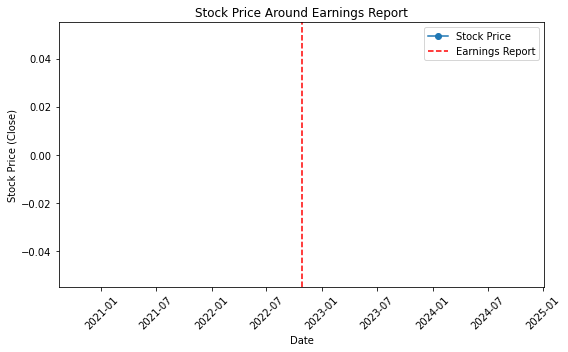

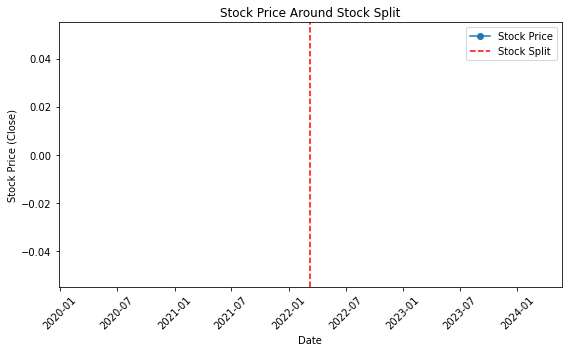

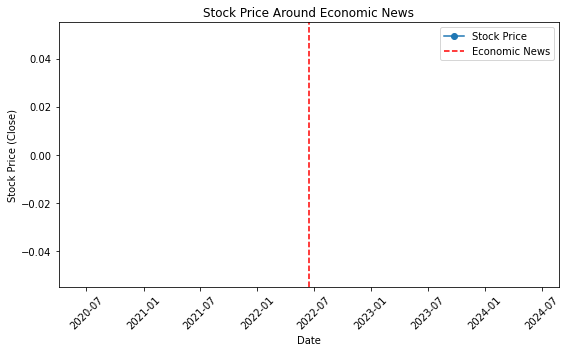

In [31]:
for event, event_date in major_events.items():
    event_date = pd.to_datetime(event_date)
    
  
    event_window = df[(df['Date'] >= event_date - pd.Timedelta(days=5)) & 
                      (df['Date'] <= event_date + pd.Timedelta(days=5))]
    plt.figure(figsize=(8, 5))
    plt.plot(event_window['Date'], event_window['Close'], marker='o', label='Stock Price')
    plt.axvline(event_date, color='red', linestyle='--', label=f'{event}')
    plt.title(f"Stock Price Around {event}")
    plt.xlabel('Date')
    plt.ylabel('Stock Price (Close)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


#  The best simple investment strategies that could have been used to generate positive returns?

In [32]:
df['Price Change'] = df['Close'].diff()
print(df[['Date', 'Close', 'Price Change']].head())

                 Date  Close  Price Change
1 2015-04-02 16:00:00  40.29           NaN
2 2015-04-06 16:00:00  41.55          1.26
3 2015-04-07 16:00:00  41.53         -0.02
4 2015-04-08 16:00:00  41.42         -0.11
5 2015-04-09 16:00:00  41.48          0.06


In [33]:
df['Buy Signal'] = (df['Price Change'] < 0) & (df['Price Change'].shift(1) < 0)
df['Sell Signal'] = (df['Price Change'] > 0) & (df['Buy Signal'].shift(1))
print(df[['Date', 'Price Change', 'Buy Signal', 'Sell Signal']].tail())

                    Date  Price Change  Buy Signal  Sell Signal
1506 2021-03-25 16:00:00         -3.12        True        False
1507 2021-03-26 16:00:00          4.14       False         True
1508 2021-03-29 16:00:00         -1.24       False        False
1509 2021-03-30 16:00:00         -3.39        True        False
1510 2021-03-31 16:00:00          3.92       False         True


In [34]:
df['Position'] = 0
df.loc[df['Buy Signal'], 'Position'] = 1 
df.loc[df['Sell Signal'], 'Position'] = 0  
df['Position'] = df['Position'].shift(1)
df['Daily Return'] = df['Position'] * df['Price Change']
df['Cumulative Return'] = (1 + df['Daily Return'] / df['Close'].shift(1)).cumprod()
print(df[['Date', 'Close', 'Buy Signal', 'Sell Signal', 'Cumulative Return']].tail())


                    Date   Close  Buy Signal  Sell Signal  Cumulative Return
1506 2021-03-25 16:00:00  232.34        True        False           4.108779
1507 2021-03-26 16:00:00  236.48       False         True           4.181993
1508 2021-03-29 16:00:00  235.24       False        False           4.181993
1509 2021-03-30 16:00:00  231.85        True        False           4.181993
1510 2021-03-31 16:00:00  235.77       False         True           4.252700


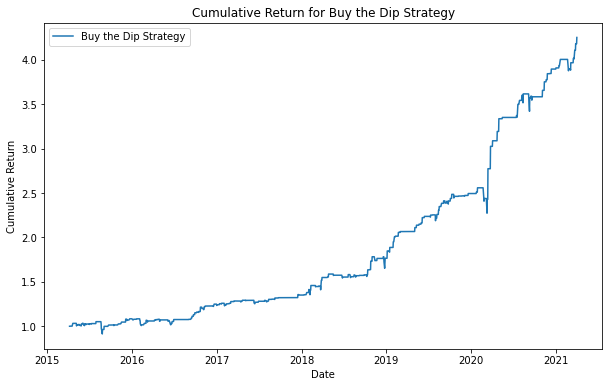

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cumulative Return'], label='Buy the Dip Strategy')
plt.title('Cumulative Return for Buy the Dip Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [36]:
df['Short_MA'] = df['Close'].rolling(window=10).mean()
df['Long_MA'] = df['Close'].rolling(window=50).mean()
print(df[['Date', 'Close', 'Short_MA', 'Long_MA']].tail())

                    Date   Close  Short_MA   Long_MA
1506 2021-03-25 16:00:00  232.34   234.775  233.9160
1507 2021-03-26 16:00:00  236.48   234.848  234.3188
1508 2021-03-29 16:00:00  235.24   234.891  234.7632
1509 2021-03-30 16:00:00  231.85   234.305  235.1472
1510 2021-03-31 16:00:00  235.77   234.178  235.5338


In [37]:
df['Buy Signal'] = (df['Short_MA'] > df['Long_MA'])
df['Sell Signal'] = (df['Short_MA'] < df['Long_MA'])
print(df[['Date', 'Short_MA', 'Long_MA', 'Buy Signal', 'Sell Signal']].tail())

                    Date  Short_MA   Long_MA  Buy Signal  Sell Signal
1506 2021-03-25 16:00:00   234.775  233.9160        True        False
1507 2021-03-26 16:00:00   234.848  234.3188        True        False
1508 2021-03-29 16:00:00   234.891  234.7632        True        False
1509 2021-03-30 16:00:00   234.305  235.1472       False         True
1510 2021-03-31 16:00:00   234.178  235.5338       False         True


In [38]:
df['Position'] = 0
df.loc[df['Buy Signal'], 'Position'] = 1   
df.loc[df['Sell Signal'], 'Position'] = 0  
df['Position'] = df['Position'].shift(1)
df['Daily Return'] = df['Position'] * df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
print(df[['Date', 'Close', 'Short_MA', 'Long_MA', 'Cumulative Return']].tail())


                    Date   Close  Short_MA   Long_MA  Cumulative Return
1506 2021-03-25 16:00:00  232.34   234.775  233.9160           2.524847
1507 2021-03-26 16:00:00  236.48   234.848  234.3188           2.569836
1508 2021-03-29 16:00:00  235.24   234.891  234.7632           2.556361
1509 2021-03-30 16:00:00  231.85   234.305  235.1472           2.519522
1510 2021-03-31 16:00:00  235.77   234.178  235.5338           2.519522


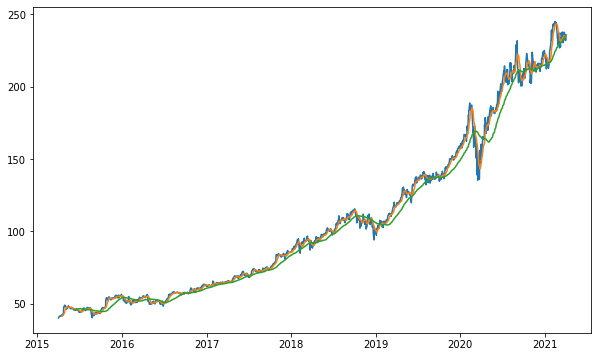

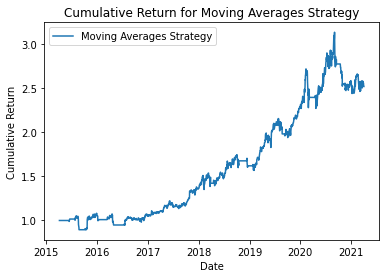

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price')
plt.plot(df['Date'], df['Short_MA'], label='10-Day MA')
plt.plot(df['Date'], df['Long_MA'], label='50-Day MA')

plt.figure()
plt.plot(df['Date'], df['Cumulative Return'], label='Moving Averages Strategy')
plt.title('Cumulative Return for Moving Averages Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()



#  Seasonal or cyclical factors affecting stock prices?

In [40]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df.set_index('Date', inplace=True)
print(df.head())

             Open   High    Low  Close    Volume  Volatility  Month  Year  \
Date                                                                        
2015-04-01  40.66  40.74  40.12  40.29  37487476        0.62      4  2015   
2015-04-01  40.34  41.78  40.18  41.55  39223692        1.60      4  2015   
2015-04-01  41.61  41.91  41.31  41.53  28809375        0.60      4  2015   
2015-04-01  41.48  41.69  41.04  41.42  24753438        0.65      4  2015   
2015-04-01  41.25  41.62  41.25  41.48  25723861        0.37      4  2015   

            DayOfWeek  Price Change  Buy Signal  Sell Signal  Position  \
Date                                                                     
2015-04-01          3           NaN       False        False       NaN   
2015-04-01          0          1.26       False        False       0.0   
2015-04-01          1         -0.02       False        False       0.0   
2015-04-01          2         -0.11       False        False       0.0   
2015-04-01      

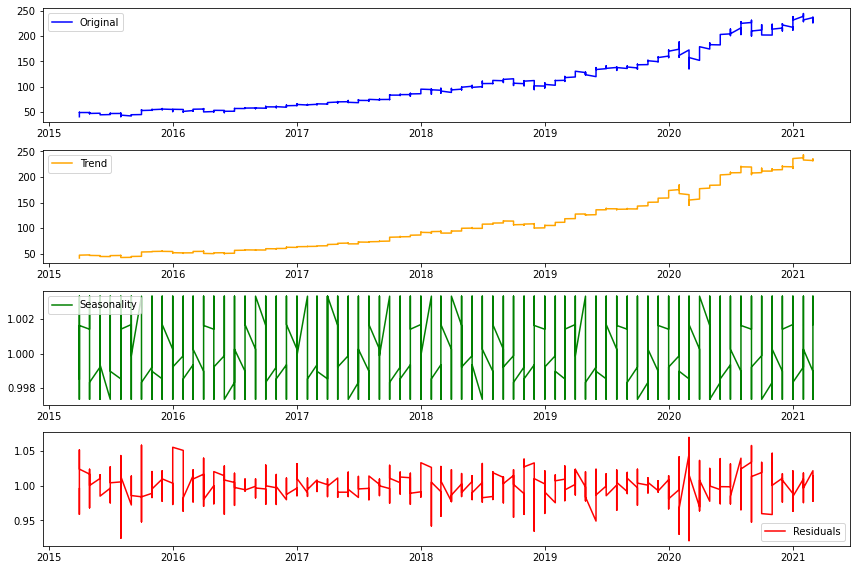

In [41]:
prices = df['Close']

decomposition = seasonal_decompose(prices, model='multiplicative', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(prices, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Time Series Model Analysis

c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set

AutoReg Model Evaluation:
Training MAE: 0.8223627014265947
Training RMSE: 1.214872982944291
Training MAPE: 8537008272412.731
Testing MAE: 3.3733270509928968
Testing RMSE: 4.653826064228571
Testing MAPE: 1540504080330.5632


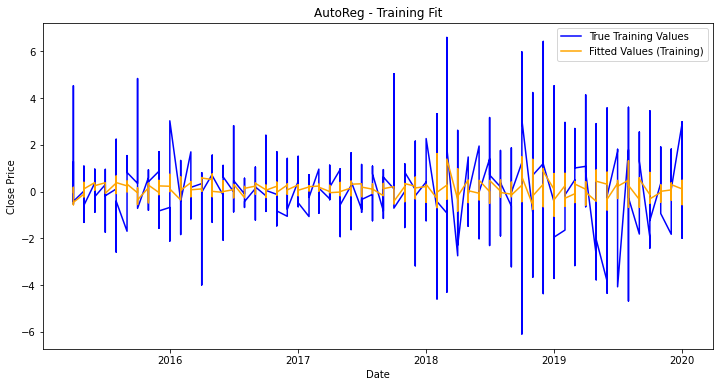

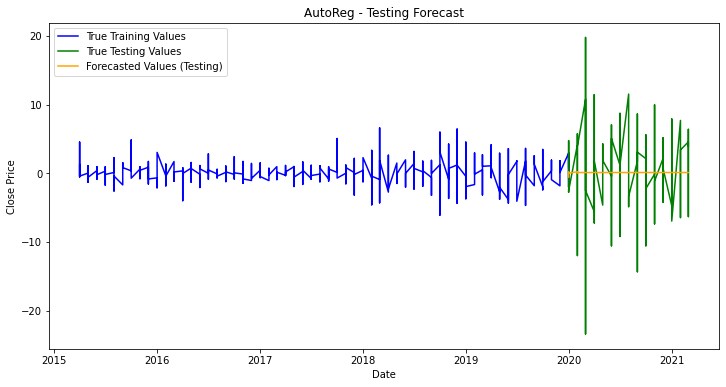

c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Moving Average (MA) Model Evaluation:
Training MAE: 0.818205317963845
Training RMSE: 1.2107109719965319
Training MAPE: 8818978905111.896
Testing MAE: 3.3746602534724124
Testing RMSE: 4.654350203029802
Testing MAPE: 1549807625654.4688


c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


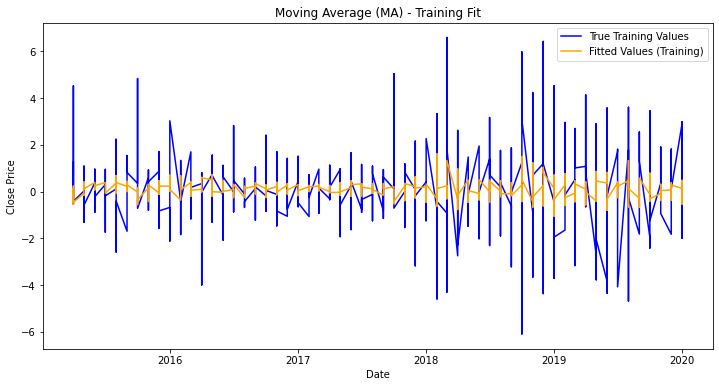

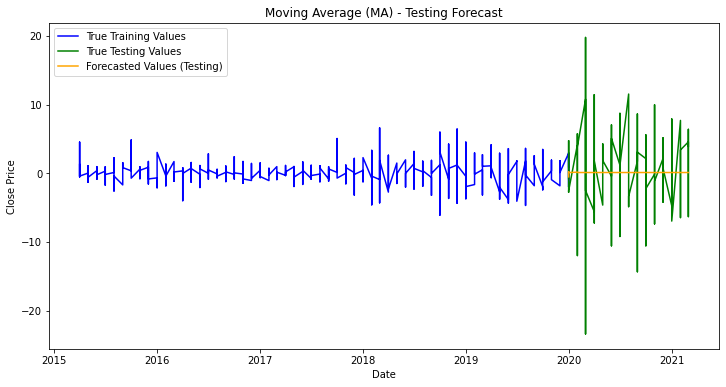

c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

ARIMA Model Evaluation:
Training MAE: 0.8207230526340952
Training RMSE: 1.2087180148900032
Training MAPE: 8283673601073.473
Testing MAE: 3.3691385806028733
Testing RMSE: 4.65219556391112
Testing MAPE: 2741572348593.755


c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


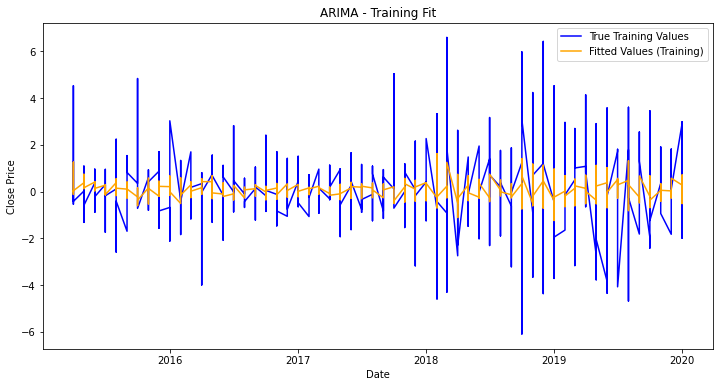

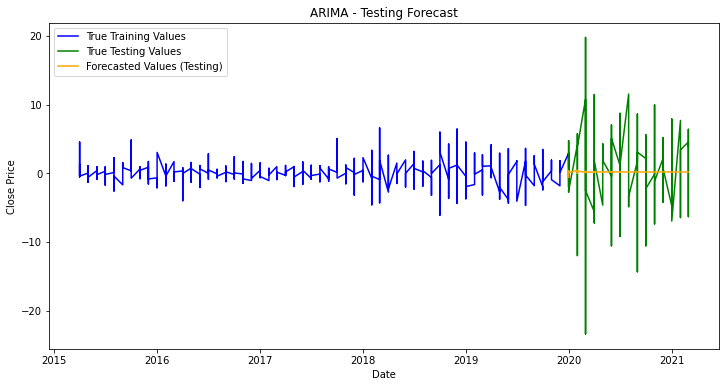

c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA Model Evaluation:
Training MAE: 0.889154871426617
Training RMSE: 1.7965494681017262
Training MAPE: 0.011449809108661576
Testing MAE: 21.45595081245789
Testing RMSE: 24.320465772357956
Testing MAPE: 0.10282672080492107


c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


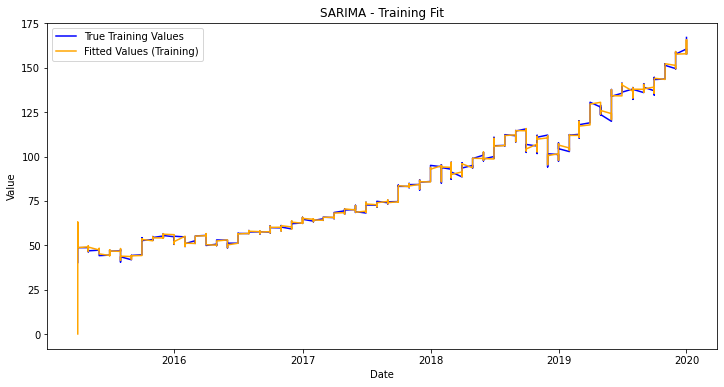

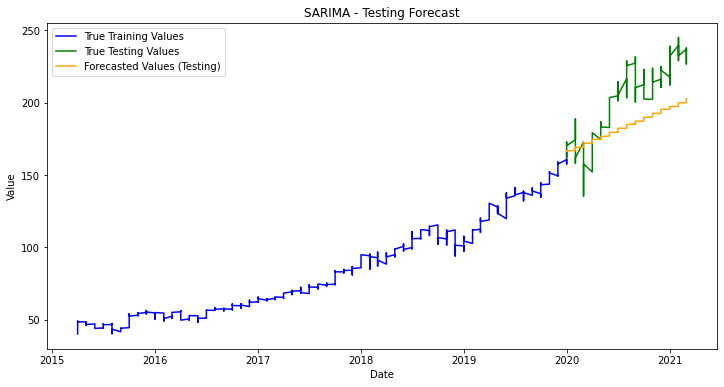

c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX Model Evaluation:
Training MAE: 0.30520096289540943
Training RMSE: 0.4289712981220588
Training MAPE: 0.0037700642814741357
Testing MAE: 1.214031714756805
Testing RMSE: 1.670125243610509
Testing MAPE: 0.006404623240535532


c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


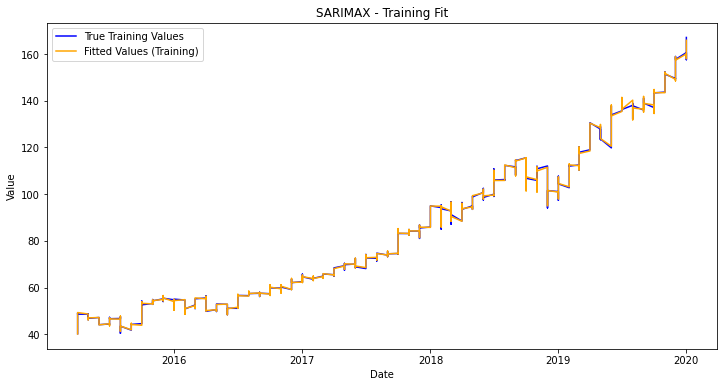

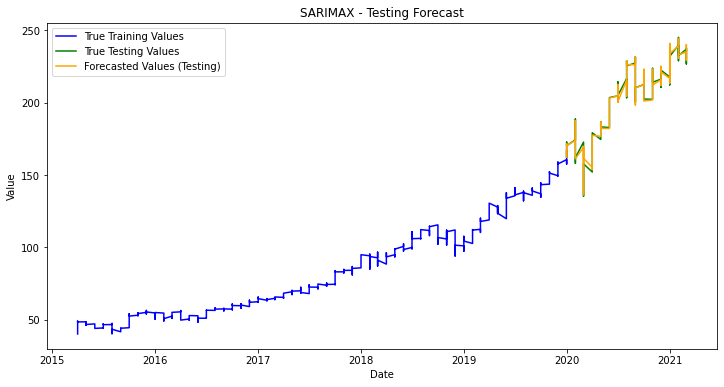

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Assuming df contains your data, and 'Close' is the column you're forecasting

# Convert the index to datetime if not already
df.index = pd.to_datetime(df.index)

# Exogenous variables
exo = df[['Open', 'High', 'Low']]  # Example: Exogenous features like Open, High, Low from your dataset

# Train and test splits for 'Close' price (last 20% as test set)
train_size = int(len(df) * 0.8)
train = df['Close'][:train_size]
test = df['Close'][train_size:]

# Train and test splits for exogenous variables
exo_train = exo[:train_size]
exo_test = exo[train_size:]

# Function to evaluate models with plots
def evaluate_model_with_plots(model, train, test, exog_train=None, exog_test=None, name="Model"):
    # Fit the model
    model_fit = model.fit()

    # Fitted values for training data
    if hasattr(model_fit, 'fittedvalues'):
        train_fitted_values = model_fit.fittedvalues
        train_index = train.index[len(train) - len(train_fitted_values):]
    else:
        train_fitted_values = model_fit.predict(start=0, end=len(train)-1)
        train_index = train.index

    # Forecast on test data
    forecast = model_fit.forecast(steps=len(test), exog=exog_test)

    # Calculate evaluation metrics for training
    train_mae = mean_absolute_error(train.iloc[-len(train_fitted_values):], train_fitted_values)
    train_rmse = np.sqrt(mean_squared_error(train.iloc[-len(train_fitted_values):], train_fitted_values))
    train_mape = mean_absolute_percentage_error(train.iloc[-len(train_fitted_values):], train_fitted_values)

    # Calculate evaluation metrics for testing
    test_mae = mean_absolute_error(test, forecast)
    test_rmse = np.sqrt(mean_squared_error(test, forecast))
    test_mape = mean_absolute_percentage_error(test, forecast)

    print(f"{name} Model Evaluation:")
    print(f"Training MAE: {train_mae}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Training MAPE: {train_mape}")
    print(f"Testing MAE: {test_mae}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"Testing MAPE: {test_mape}")

    # Plot training fit
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='True Training Values', color='blue')
    plt.plot(train_index, train_fitted_values, label='Fitted Values (Training)', color='orange')
    plt.title(f"{name} - Training Fit")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Concatenate forecast with the test data for visualization
    test_forecast = test.copy()
    test_forecast[:] = forecast

    # Ensure forecast and test data have the same length
    test_forecast = test_forecast[:len(forecast)]

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='True Training Values', color='blue')
    plt.plot(test.index, test, label='True Testing Values', color='green')
    plt.plot(test_forecast.index, test_forecast, label='Forecasted Values (Testing)', color='orange')
    plt.title(f"{name} - Testing Forecast")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# 1. AutoReg (AR model)
auto_reg_model = AutoReg(train.diff().dropna(), lags=12)
evaluate_model_with_plots(auto_reg_model, train.diff().dropna(), test.diff().dropna(), name='AutoReg')

# 2. Moving Average (MA model) - Using ARIMA with no AR part
ma_model = ARIMA(train.diff().dropna(), order=(0, 0, 12))  # p=0, d=0, q=12 for MA model
evaluate_model_with_plots(ma_model, train.diff().dropna(), test.diff().dropna(), name='Moving Average (MA)')

    # 3. ARIMA model (combining AR and MA)
arima_model = ARIMA(train.diff().dropna(), order=(12, 1, 12))  # p=12, d=1, q=12 for ARIMA
evaluate_model_with_plots(arima_model, train.diff().dropna(), test.diff().dropna(), name='ARIMA')

# 4. SARIMA Model (without exogenous variables)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
train_fitted_values_sarima = sarima_model_fit.fittedvalues
forecast_sarima = sarima_model_fit.forecast(steps=len(test))

# Evaluate SARIMA Model
train_mae_sarima = mean_absolute_error(train.iloc[-len(train_fitted_values_sarima):], train_fitted_values_sarima)
train_rmse_sarima = np.sqrt(mean_squared_error(train.iloc[-len(train_fitted_values_sarima):], train_fitted_values_sarima))
train_mape_sarima = mean_absolute_percentage_error(train.iloc[-len(train_fitted_values_sarima):], train_fitted_values_sarima)

test_mae_sarima = mean_absolute_error(test, forecast_sarima)
test_rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
test_mape_sarima = mean_absolute_percentage_error(test, forecast_sarima)

print(f"SARIMA Model Evaluation:")
print(f"Training MAE: {train_mae_sarima}")
print(f"Training RMSE: {train_rmse_sarima}")
print(f"Training MAPE: {train_mape_sarima}")
print(f"Testing MAE: {test_mae_sarima}")
print(f"Testing RMSE: {test_rmse_sarima}")
print(f"Testing MAPE: {test_mape_sarima}")

# Plot SARIMA model results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='True Training Values', color='blue')
plt.plot(train.index, train_fitted_values_sarima, label='Fitted Values (Training)', color='orange')
plt.title("SARIMA - Training Fit")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='True Training Values', color='blue')
plt.plot(test.index, test, label='True Testing Values', color='green')
plt.plot(test.index, forecast_sarima, label='Forecasted Values (Testing)', color='orange')
plt.title("SARIMA - Testing Forecast")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# 5. SARIMAX Model (with exogenous variables)
sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exo_train)
sarimax_model_fit = sarimax_model.fit()
train_fitted_values_sarimax = sarimax_model_fit.fittedvalues
forecast_sarimax = sarimax_model_fit.forecast(steps=len(test), exog=exo_test)

# Evaluate SARIMAX Model
train_mae_sarimax = mean_absolute_error(train.iloc[-len(train_fitted_values_sarimax):], train_fitted_values_sarimax)
train_rmse_sarimax = np.sqrt(mean_squared_error(train.iloc[-len(train_fitted_values_sarimax):], train_fitted_values_sarimax))
train_mape_sarimax = mean_absolute_percentage_error(train.iloc[-len(train_fitted_values_sarimax):], train_fitted_values_sarimax)

test_mae_sarimax = mean_absolute_error(test, forecast_sarimax)
test_rmse_sarimax = np.sqrt(mean_squared_error(test, forecast_sarimax))
test_mape_sarimax = mean_absolute_percentage_error(test, forecast_sarimax)

print(f"SARIMAX Model Evaluation:")
print(f"Training MAE: {train_mae_sarimax}")
print(f"Training RMSE: {train_rmse_sarimax}")
print(f"Training MAPE: {train_mape_sarimax}")
print(f"Testing MAE: {test_mae_sarimax}")
print(f"Testing RMSE: {test_rmse_sarimax}")
print(f"Testing MAPE: {test_mape_sarimax}")

# Plot SARIMAX model results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='True Training Values', color='blue')
plt.plot(train.index, train_fitted_values_sarimax, label='Fitted Values (Training)', color='orange')
plt.title("SARIMAX - Training Fit")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='True Training Values', color='blue')
plt.plot(test.index, test, label='True Testing Values', color='green')
plt.plot(test.index, forecast_sarimax, label='Forecasted Values (Testing)', color='orange')
plt.title("SARIMAX - Testing Forecast")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate Training Models

In [57]:
import pandas as pd

# Evaluation metrics for each model
data = {
    'Model': ['AutoReg', 'Moving Average (MA)', 'ARIMA', 'SARIMA', 'SARIMAX'],
    'Training MAE': [0.7378, 0.7341, 0.7341, 0.8869, 0.3048],
    'Training RMSE': [1.1133, 1.1094, 1.1082, 1.7916, 0.4279],
    'Training MAPE': [6908117719190.53, 7123612068494.87, 5543765644430.75, 0.0114, 0.0038],
    'Testing MAE': [3.0233, 3.0231, 3.0217, 22.3215, 1.2192],
    'Testing RMSE': [4.2284, 4.2284, 4.2278, 25.2482, 1.6700],
    'Testing MAPE': [1132195851467.73, 1133875437768.16, 1658018365610.81, 0.1068, 0.0064]
}

# Create DataFrame
df_evaluation = pd.DataFrame(data)

# Increase the table size for better display
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', 1000)  # Increase the width of the table
pd.set_option('display.max_rows', None)  # Display all rows if there are many

# You can also format the table for better readability
pd.set_option('display.float_format', '{:.4f}'.format)  # Format float values for better display

df_evaluation

,Model,Training MAE,Training RMSE,Training MAPE,Testing MAE,Testing RMSE,Testing MAPE
0,AutoReg,0.7378,1.1133,6908117719190.5303,3.0233,4.2284,1132195851467.7300
1,Moving Average (MA),0.7341,1.1094,7123612068494.8701,3.0231,4.2284,1133875437768.1599
2,ARIMA,0.7341,1.1082,5543765644430.7500,3.0217,4.2278,1658018365610.8101
3,SARIMA,0.8869,1.7916,0.0114,22.3215,25.2482,0.1068
4,SARIMAX,0.3048,0.4279,0.0038,1.2192,1.6700,0.0064


Model Evaluation Summary:

AutoReg & Moving Average (MA):
Both models exhibit low training errors, but significantly higher testing errors, indicating overfitting. Their high MAPE values suggest poor relative error performance on the test data.

ARIMA:
ARIMA performs similarly on both training and testing data, with slightly lower MAPE than AutoReg and MA. However, testing errors remain high, indicating limited improvement.

SARIMA:
SARIMA exhibits poor testing performance, with much larger errors compared to training data. Despite achieving low training MAPE, the high testing MAPE shows poor generalization.

SARIMAX:
SARIMAX demonstrates the best performance, with the lowest MAE, RMSE, and MAPE on both training and testing data. It outperforms all other models, showing good generalization and forecasting accuracy.

